Circuit library

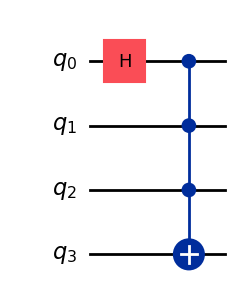

In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, MCXGate
 
mcx_gate = MCXGate(3)
hadamard_gate = HGate()
 
qc = QuantumCircuit(4)
qc.append(hadamard_gate, [0])
qc.append(mcx_gate, [0, 1, 2, 3])
qc.draw("mpl")

N-local circuits

These circuits alternate layers of single-qubit rotation gates with layers of multi-qubit entangling gates.

This family of circuits is popular in variational quantum algorithms because they can produce a wide range of quantum states. Variational algorithms adjust the gate parameters to find states that have certain properties (such as states that represent a good solution to an optimization problem). For this purpose, many circuits in the library are parameterized, which means you can define them without fixed values.

The following code cell imports a n_local circuit, in which the entangling gates are two-qubit gates. This circuit interleaves blocks of parameterized single-qubit gates, followed by entangling blocks of two-qubit gates. The following code creates a three-qubit circuit, with single-qubit RX-gates and two-qubit CZ-gates.




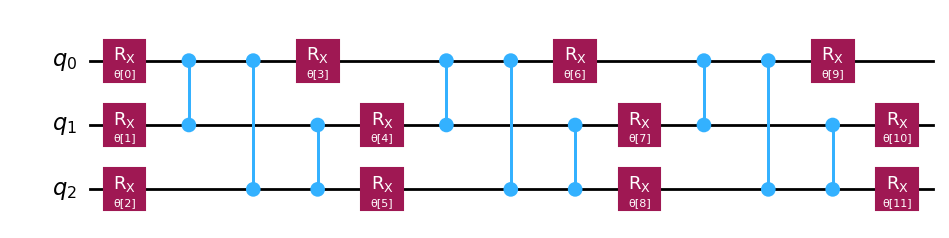

In [2]:
from qiskit.circuit.library import n_local
 
two_local = n_local(3, "rx", "cz")
two_local.draw("mpl")

In [3]:
two_local.parameters

ParameterView([ParameterVectorElement(θ[0]), ParameterVectorElement(θ[1]), ParameterVectorElement(θ[2]), ParameterVectorElement(θ[3]), ParameterVectorElement(θ[4]), ParameterVectorElement(θ[5]), ParameterVectorElement(θ[6]), ParameterVectorElement(θ[7]), ParameterVectorElement(θ[8]), ParameterVectorElement(θ[9]), ParameterVectorElement(θ[10]), ParameterVectorElement(θ[11])])

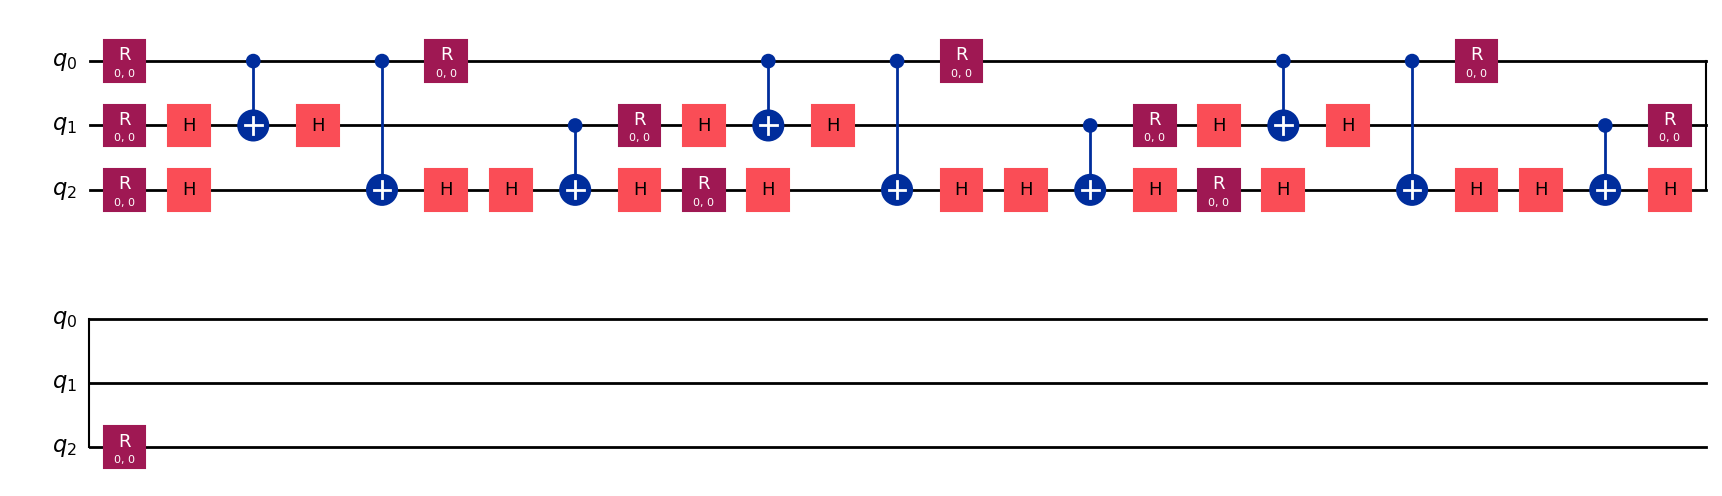

In [4]:
bound_circuit = two_local.assign_parameters(
    {p: 0 for p in two_local.parameters}
)
bound_circuit.decompose().draw("mpl")

Data-encoding circuits

These parameterized circuits encode data onto quantum states for processing by quantum machine learning algorithms. Some circuits supported by Qiskit are:

Amplitude encoding, which encodes each number into the amplitude of a basis state. This can store 
2
n
2 
n
  numbers in a single state, but can be costly to implement.
Basis encoding, which encodes an integer 
k
k by preparing the corresponding basis state 
∣
k
⟩
∣k⟩.
Angle encoding, which sets each number in the data as a rotation angle in a parameterized circuit.
The best approach depends upon the specifics of your application. On current quantum computers, however, we often use angle-encoding circuits such as the zz_feature_map.

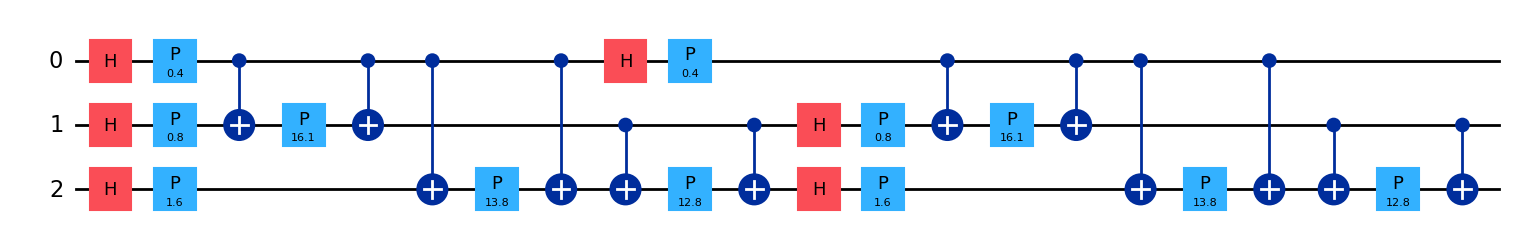

In [5]:
from qiskit.circuit.library import zz_feature_map
 
features = [0.2, 0.4, 0.8]
feature_map = zz_feature_map(feature_dimension=len(features))
 
encoded = feature_map.assign_parameters(features)
encoded.draw("mpl")


Time-evolution circuits

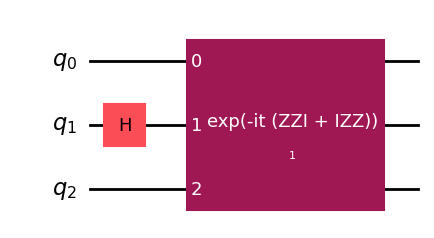

In [6]:
from qiskit.circuit.library import PauliEvolutionGate
from qiskit.circuit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
 
 
# Prepare an initial state with a Hadamard on the middle qubit
state = QuantumCircuit(3)
state.h(1)
 
hamiltonian = SparsePauliOp(["ZZI", "IZZ"])
evolution = PauliEvolutionGate(hamiltonian, time=1)
 
# Evolve state by appending the evolution gate
state.compose(evolution, inplace=True)
 
state.draw("mpl")

Benchmarking and complexity-theory circuits


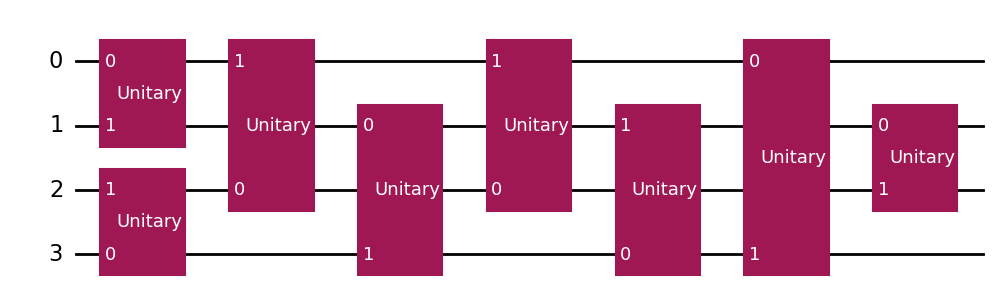

In [8]:
from qiskit.circuit.library import quantum_volume
 
quantum_volume(4).draw("mpl")


Arithmetic circuits

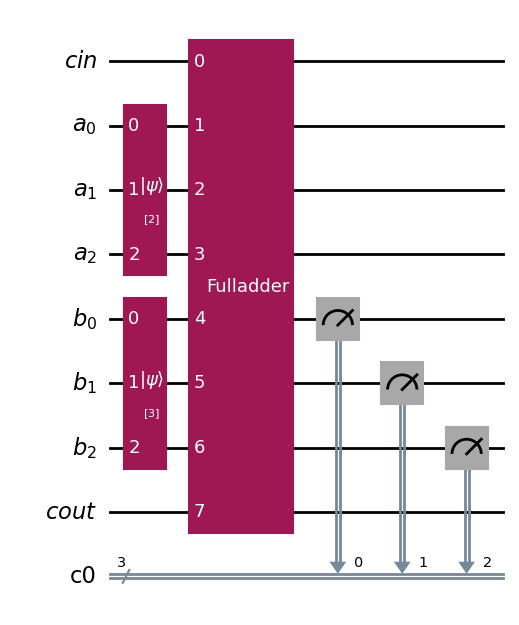

In [9]:
from qiskit.circuit.library import FullAdderGate
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
 
adder = FullAdderGate(3)  # Adder of 3-bit numbers
 
# Create the number A=2
reg_a = QuantumRegister(3, "a")
number_a = QuantumCircuit(reg_a)
number_a.initialize(2)  # Number 2; |010>
 
# Create the number B=3
reg_b = QuantumRegister(3, "b")
number_b = QuantumCircuit(reg_b)
number_b.initialize(3)  # Number 3; |011>
 
# Create a circuit to hold everything, including a classical register for
# the result
qregs = [
    QuantumRegister(1, "cin"),
    QuantumRegister(3, "a"),
    QuantumRegister(3, "b"),
    QuantumRegister(1, "cout"),
]
reg_result = ClassicalRegister(3)
circuit = QuantumCircuit(*qregs, reg_result)
 
# Compose number initializers with the adder. Adder stores the result to
# register B, so we'll measure those qubits.
circuit = (
    circuit.compose(number_a, qubits=reg_a)
    .compose(number_b, qubits=reg_b)
    .compose(adder)
)
circuit.measure(reg_b, reg_result)
circuit.draw("mpl")